<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab/blob/MASTER/ESCAPE_VELOCITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [2]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("escape_velocity.csv")
velocity_list = df["Velocity"].tolist()
escape_list = df["Escaped"].tolist()

fig = px.scatter(x=velocity_list, y=escape_list)
fig.show()

In [3]:
import numpy as np
velocity_array = np.array(velocity_list)
escape_array = np.array(escape_list)

m,c = np.polyfit(velocity_array, escape_array,1)

y=[]
for x in velocity_array:
  y_value = m*x + c
  y.append(y_value)

fig = px.scatter(x=velocity_array, y=escape_array)
fig.update_layout(shapes=[
    dict(
        type='line',
        y0 = min(y), y1=max(y),
        x0=min(velocity_array), x1 = max(velocity_array)
    )
])

fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



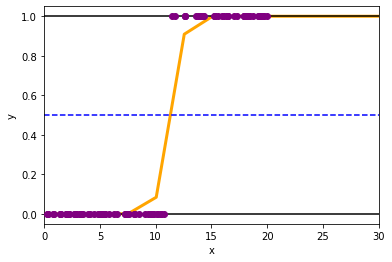

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(velocity_list, (len(velocity_list),1))
Y = np.reshape(escape_list, (len(escape_list),1))

lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(), Y, color = 'Purple', zorder = 20)

def model(x):
  return 1/(1+np.exp(-x))

X_test = np.linspace(0,500,200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()
plt.plot(X_test, chances, color = 'Orange', linewidth = 3)
plt.axhline(y=0, color = 'k', linestyle = '-')
plt.axhline(y=1, color = 'k', linestyle = '-')
plt.axhline(y=0.5, color = 'b', linestyle = '--')
plt.axvline(x=X_test[60], color = 'brown', linestyle = '--')

plt.ylabel('y')
plt.xlabel('x')
plt.xlim(0,30)
plt.show()

In [6]:
velocity = float(input("Enter Velocity : "))
chances = model(velocity*lr.coef_ + lr.intercept_).ravel()[0]
if chances <= 0.01: 
  print("The person will not escape")
elif chances >= 1: 
  print("The person will escape")
elif chances <= 0.05: 
  print("The person might not escape")
else:
  print("The person may escape")

Enter Velocity : 50
The person will escape
